In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing_data.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3724850,3481,3,2,3,no,no,no,no,no,1,yes,unfurnished
1,4529408,8175,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
2,1877898,7341,2,1,3,yes,yes,yes,no,no,1,no,semi-furnished
3,1790689,7541,2,1,1,yes,yes,no,no,no,1,yes,semi-furnished
4,2420738,6577,3,1,2,yes,no,yes,no,no,0,no,unfurnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             1500 non-null   int64 
 1   area              1500 non-null   int64 
 2   bedrooms          1500 non-null   int64 
 3   bathrooms         1500 non-null   int64 
 4   stories           1500 non-null   int64 
 5   mainroad          1500 non-null   object
 6   guestroom         1500 non-null   object
 7   basement          1500 non-null   object
 8   hotwaterheating   1500 non-null   object
 9   airconditioning   1500 non-null   object
 10  parking           1500 non-null   int64 
 11  prefarea          1500 non-null   object
 12  furnishingstatus  1500 non-null   object
dtypes: int64(6), object(7)
memory usage: 152.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.500000e+03,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,4.837742e+06,5161.324000,2.444667,0.806000,1.358667,0.379333
std,1.877052e+06,2226.547308,0.792900,0.550666,0.893620,0.647858
min,-1.217150e+06,-2059.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.626378e+06,3682.500000,2.000000,0.000000,1.000000,0.000000
50%,4.791895e+06,5090.000000,2.000000,1.000000,1.000000,0.000000
75%,6.058472e+06,6617.750000,3.000000,1.000000,2.000000,1.000000
max,1.039934e+07,13066.000000,5.000000,3.000000,4.000000,3.000000


In [6]:
# Give a quick summary of missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

There is no missing values.

In [7]:
df.duplicated().sum()

np.int64(0)

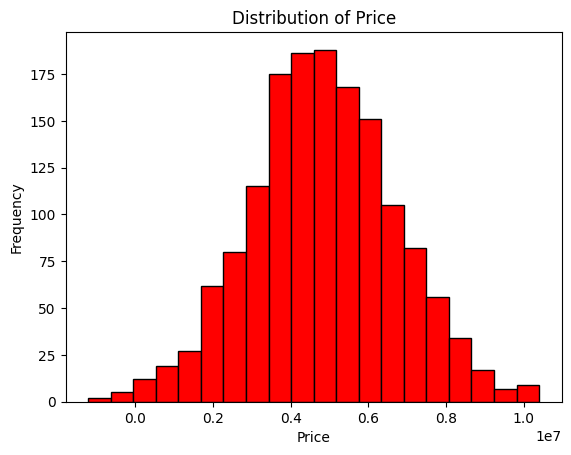

In [8]:
plt.hist(df["price"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

Why is there a negative price?

In [9]:
df[df["price"] < 0]


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,-183041,5876,2,1,3,yes,yes,no,no,no,0,no,semi-furnished
57,-193903,7818,2,1,1,no,no,no,no,no,0,no,semi-furnished
223,-106036,7208,3,1,2,yes,no,no,no,no,0,no,semi-furnished
575,-519603,5460,2,1,1,yes,yes,yes,no,no,1,no,unfurnished
822,-31988,4699,4,1,1,yes,yes,no,no,no,0,yes,furnished
1075,-1217150,3923,2,1,1,yes,no,yes,no,no,0,no,semi-furnished
1127,-975930,8972,3,1,2,yes,no,no,no,no,1,no,furnished
1255,-571333,6086,3,1,1,yes,no,no,no,no,0,no,unfurnished


In [10]:
df = df[df["price"] > 0]

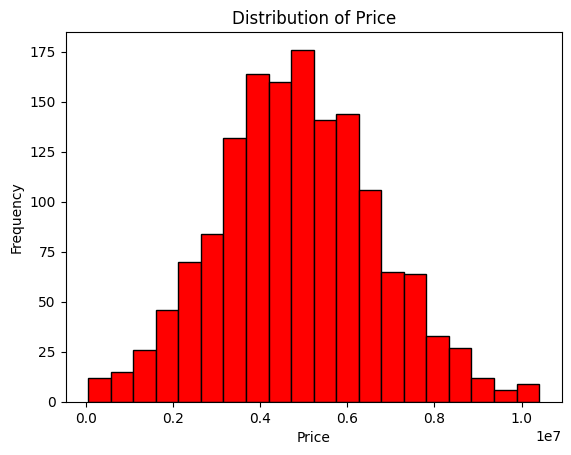

In [11]:
plt.hist(df["price"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [12]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,1.492000e+03,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000
mean,4.866228e+06,5155.458445,2.443700,0.804960,1.357909,0.380027
std,1.840951e+06,2228.149025,0.793278,0.551957,0.894456,0.648749
min,6.029800e+04,-2059.000000,0.000000,0.000000,0.000000,-1.000000
25%,3.635928e+06,3672.500000,2.000000,0.000000,1.000000,0.000000
50%,4.806088e+06,5080.000000,2.000000,1.000000,1.000000,0.000000
75%,6.063283e+06,6614.750000,3.000000,1.000000,2.000000,1.000000
max,1.039934e+07,13066.000000,5.000000,3.000000,4.000000,3.000000


It seems like the price, there is a normal distribution with a mean of 4.866228e+06 and a standard deviation of 1.840951e+06. That means that the price is normally distributed.

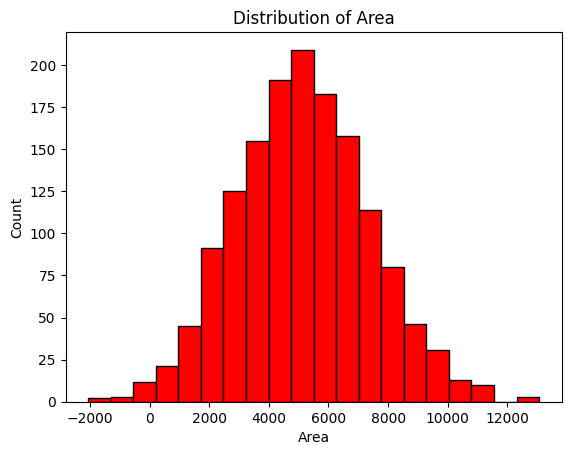

In [13]:
plt.hist(df["area"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

Negative area doesn't make sense too. I plan to remove it.

In [14]:
# Remove negative areas
df = df[df["area"] > 0]

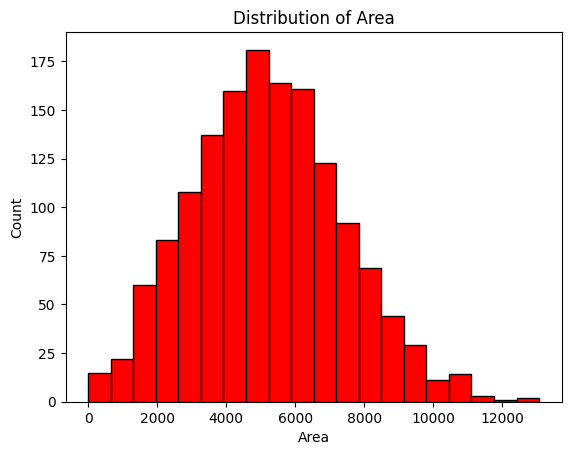

In [15]:
plt.hist(df["area"], bins=20, color="red", edgecolor="black")
plt.title("Distribution of Area")
plt.xlabel("Area")
plt.ylabel("Count")
plt.show()

Great, we have cleaned up our data.

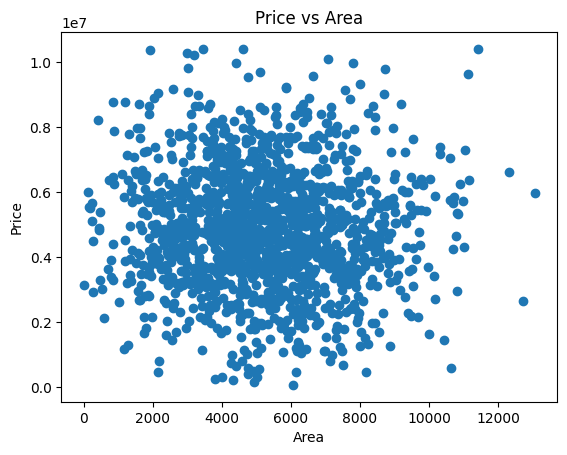

In [16]:
# Create chart of price vs area
plt.scatter(df["area"], df["price"])
plt.title("Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

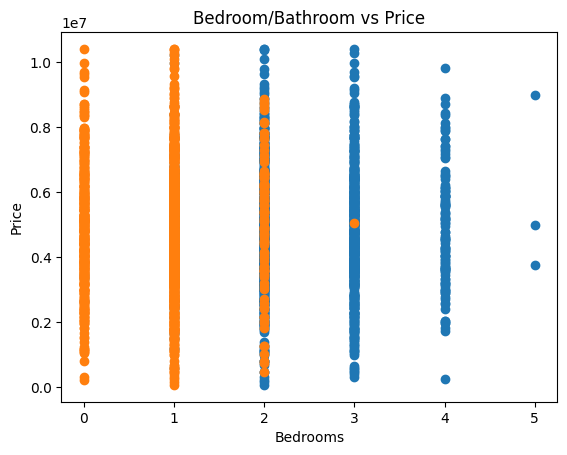

In [17]:
# Bedroom/Bathroom vs Price
plt.scatter(df["bedrooms"], df["price"])
plt.scatter(df["bathrooms"], df["price"])
plt.title("Bedroom/Bathroom vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

In [18]:
df["furnishingstatus"].value_counts()

furnishingstatus
semi-furnished    598
unfurnished       499
furnished         382
Name: count, dtype: int64

In [19]:
df.groupby("furnishingstatus")["price"].mean().sort_values(ascending=False)

furnishingstatus
unfurnished       4.925383e+06
furnished         4.869455e+06
semi-furnished    4.821556e+06
Name: price, dtype: float64

In [20]:
df.sort_values(by="area", ascending=False)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
951,5977047,13066,3,0,2,yes,no,no,no,no,0,no,furnished
579,2655667,12716,1,1,0,no,no,yes,no,no,0,no,semi-furnished
224,6607971,12325,2,0,3,yes,no,no,no,yes,1,yes,semi-furnished
157,10392396,11433,2,1,2,yes,no,no,no,yes,0,no,furnished
276,6371333,11170,3,1,2,yes,yes,no,no,no,0,no,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,5109203,231,1,0,1,yes,no,yes,no,no,0,no,semi-furnished
119,5495419,184,3,1,2,yes,no,yes,no,yes,1,no,semi-furnished
524,5539042,162,4,0,2,yes,yes,no,no,no,1,no,semi-furnished
540,5990725,126,3,0,1,yes,no,no,no,yes,0,yes,semi-furnished


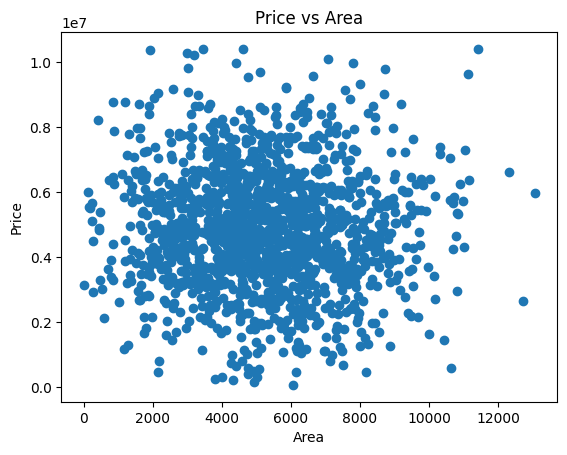

In [21]:
plt.scatter(df["area"], df["price"])
plt.title("Price vs Area")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

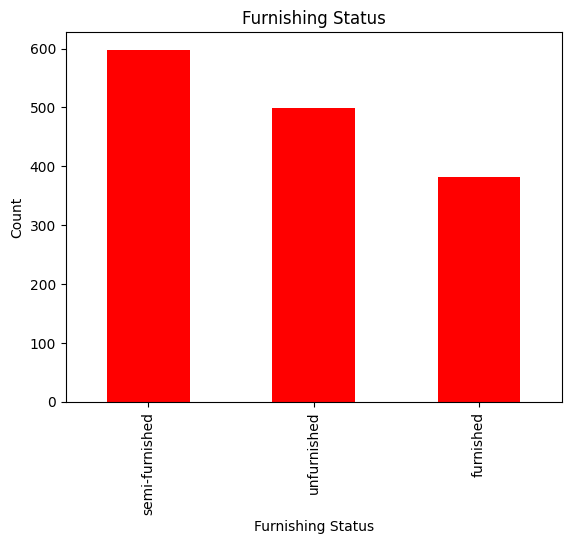

In [22]:
df["furnishingstatus"].value_counts().plot(kind="bar", color="red")
plt.title("Furnishing Status")
plt.xlabel("Furnishing Status")
plt.ylabel("Count")
plt.show()

In [23]:
df["mainroad"].value_counts(ascending=False)

mainroad
yes    1272
no      207
Name: count, dtype: int64

In [24]:
df["airconditioning"].value_counts(ascending=False)

airconditioning
no     1030
yes     449
Name: count, dtype: int64

More yes for main road. More no on air conditioning.

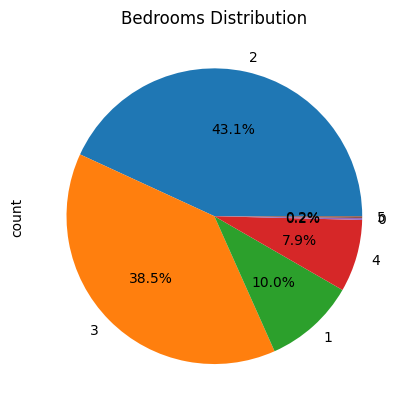

In [25]:
df["bedrooms"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Bedrooms Distribution")
plt.show()

Select feature variables for machine learning, and change them with label encoder.
What it means is that I will prepare the data for training.

In [26]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3724850,3481,3,2,3,no,no,no,no,no,1,yes,unfurnished
1,4529408,8175,3,1,2,yes,no,yes,no,no,0,no,semi-furnished
2,1877898,7341,2,1,3,yes,yes,yes,no,no,1,no,semi-furnished
3,1790689,7541,2,1,1,yes,yes,no,no,no,1,yes,semi-furnished
4,2420738,6577,3,1,2,yes,no,yes,no,no,0,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3727439,8151,3,1,3,yes,no,no,no,no,1,no,furnished
1496,4435384,2536,2,0,1,yes,no,yes,no,yes,-1,yes,unfurnished
1497,4254269,8020,3,1,3,yes,no,yes,no,no,1,no,semi-furnished
1498,3772189,5586,3,1,1,yes,yes,no,no,no,1,no,semi-furnished


In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["furnishingstatus"] = le.fit_transform(df["furnishingstatus"])
df["mainroad"] = le.fit_transform(df["mainroad"])

In [28]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3724850,3481,3,2,3,0,no,no,no,no,1,yes,2
1,4529408,8175,3,1,2,1,no,yes,no,no,0,no,1
2,1877898,7341,2,1,3,1,yes,yes,no,no,1,no,1
3,1790689,7541,2,1,1,1,yes,no,no,no,1,yes,1
4,2420738,6577,3,1,2,1,no,yes,no,no,0,no,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3727439,8151,3,1,3,1,no,no,no,no,1,no,0
1496,4435384,2536,2,0,1,1,no,yes,no,yes,-1,yes,2
1497,4254269,8020,3,1,3,1,no,yes,no,no,1,no,1
1498,3772189,5586,3,1,1,1,yes,no,no,no,1,no,1


Now, I will prepare and split the data for training

In [29]:
y = df["price"]

In [30]:
X = df[["area", "bedrooms", "bathrooms", "mainroad", "furnishingstatus"]]

In [31]:
X

,area,bedrooms,bathrooms,mainroad,furnishingstatus
0,3481,3,2,0,2
1,8175,3,1,1,1
2,7341,2,1,1,1
3,7541,2,1,1,1
4,6577,3,1,1,2
...,...,...,...,...,...
1495,8151,3,1,1,0
1496,2536,2,0,1,2
1497,8020,3,1,1,1
1498,5586,3,1,1,1


In [32]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

This is just a function to evaluate and compare the models.
It's time to test out the models.

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error: ", mean_squared_error(y_test, predictions))

In [35]:
#Start linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
predictions = lr.predict(X_test_scaled)
modelresults(predictions)

Mean Absolute Error:  1492469.6739214216
Mean Squared Error:  3455405500393.005


In [36]:
df["price"].mean()

np.float64(4868957.700473293)

In [37]:
#Start SVC model
from sklearn.svm import SVR
svr = SVR()

In [38]:

svr.fit(X_train_scaled, y_train)
predictions = svr.predict(X_test_scaled)
modelresults(predictions)

Mean Absolute Error:  1478331.0129649406
Mean Squared Error:  3358357511361.983


In [39]:
#Start Random Forest model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [40]:
rf.fit(X_train_scaled, y_train)
predictions = rf.predict(X_test_scaled)
modelresults(predictions)

Mean Absolute Error:  1625975.557215251
Mean Squared Error:  4060547206050.3193


Because this is a generated dataset, the models cannot train well (as the dataset does not fit any standard patterns)
At least I learned something new!